In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
accidents_data = pd.read_csv('Dataset/US_Accidents_Dec19.csv', parse_dates = ['Start_Time', 'End_Time'])

## Dataset filtering to obtain one year data - 2019

In [3]:
year = pd.DatetimeIndex(accidents_data['Start_Time']).year
accidents_raw = accidents_data[year == 2019]
accidents_raw.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [4]:
file_path = 'USA_Accidents_2019.csv'
accidents_raw.to_csv(file_path, index = False)

## Data Cleansing

In [5]:
#Dropping the unwanted columns
accidents_raw = accidents_raw.drop(columns = ['Source', 'TMC', 'End_Lat', 'End_Lng', 'Description', 'Number', 'Street', 'Country', 'Side', 'Zipcode', 'Airport_Code', 'Weather_Timestamp', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Wind_Direction', 'Weather_Condition', 'Precipitation(in)', 'Wind_Chill(F)'])

In [6]:
#number of missing values in each column
accidents_raw.isna().sum()

ID                     0
Severity               0
Start_Time             0
End_Time               0
Start_Lat              0
Start_Lng              0
Distance(mi)           0
City                  19
County                 0
State                  0
Timezone            1451
Temperature(F)     17184
Humidity(%)        18266
Pressure(in)       13795
Visibility(mi)     18481
Wind_Speed(mph)    60083
Sunrise_Sunset        22
dtype: int64

In [7]:
#Dropping the records with missing values
accidents_raw = accidents_raw.dropna()

In [8]:
#Creating new column, Duration by subtracting Start_Time and End_Time
accidents_raw['Duration'] = accidents_raw.End_Time - accidents_raw.Start_Time
accidents_raw.drop(columns = ['End_Time'], inplace = True)

In [9]:
#Processed Dataset
accidents = accidents_raw

## Data Analysis

### Descriptive Statistics

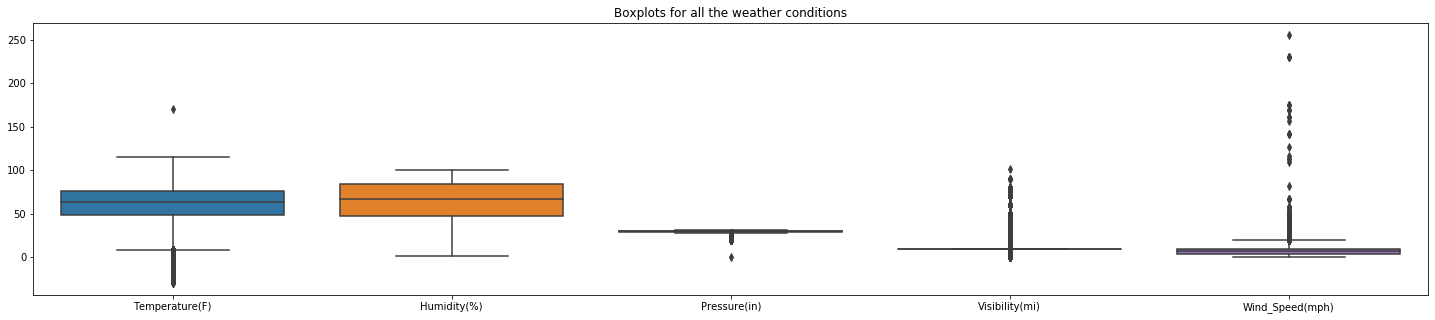

In [11]:
#Boxplots with all weather attributes
weather_conditions = accidents[['Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']]
plt.figure(figsize = (25, 5))
plt.title('Boxplots for all the weather conditions')
sns.boxplot(data = weather_conditions)
plt.show()

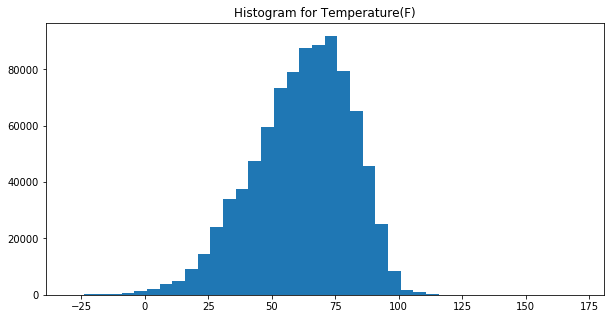

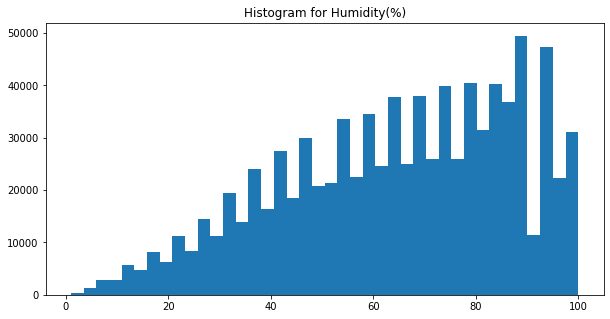

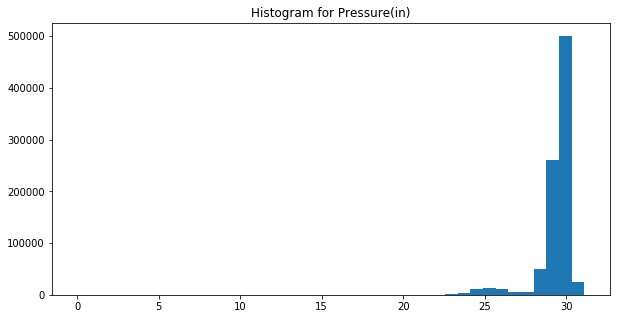

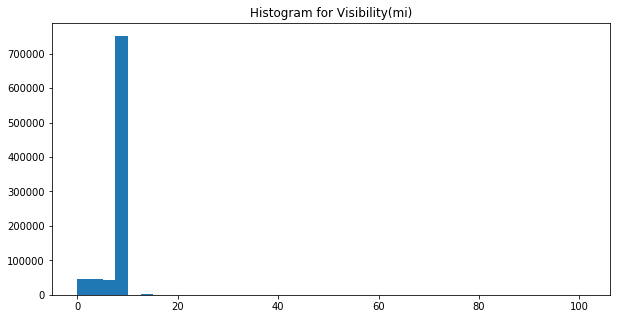

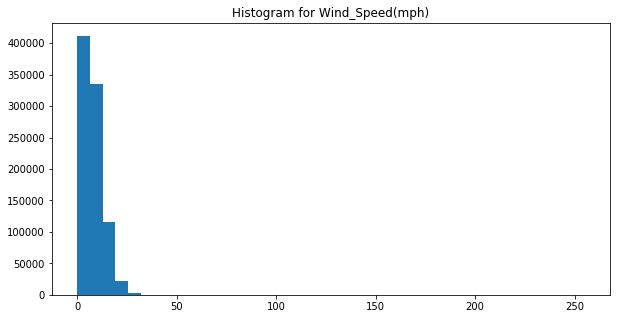

In [12]:
#Histograms of each weather attribute

for i in weather_conditions:
    plt.figure(figsize = (10, 5))
    plt.hist(accidents[i], bins = 40)
    plt.title('Histogram for ' + i)
    plt.show()

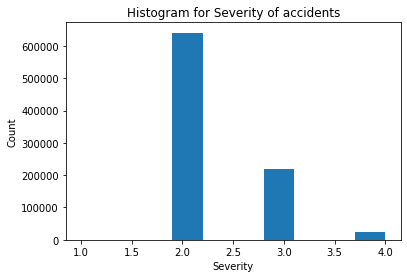

In [13]:
#Histogram of Severity of the accident

plt.hist(accidents['Severity'])
plt.title('Histogram for Severity of accidents')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()

In [20]:
#Accidents count per State
accident_count_state_wise = accidents.groupby('State', as_index=False)['ID'].count().sort_values(by = 'ID', ascending = False)
accident_count_state_wise.rename(columns = {'ID': 'ID_Count_State_Wide'}, inplace = True)
accident_count_state_wise.tail()


,State,ID_Count_State_Wide
44,VT,210
24,MT,130
48,WY,103
39,SD,27
26,ND,16


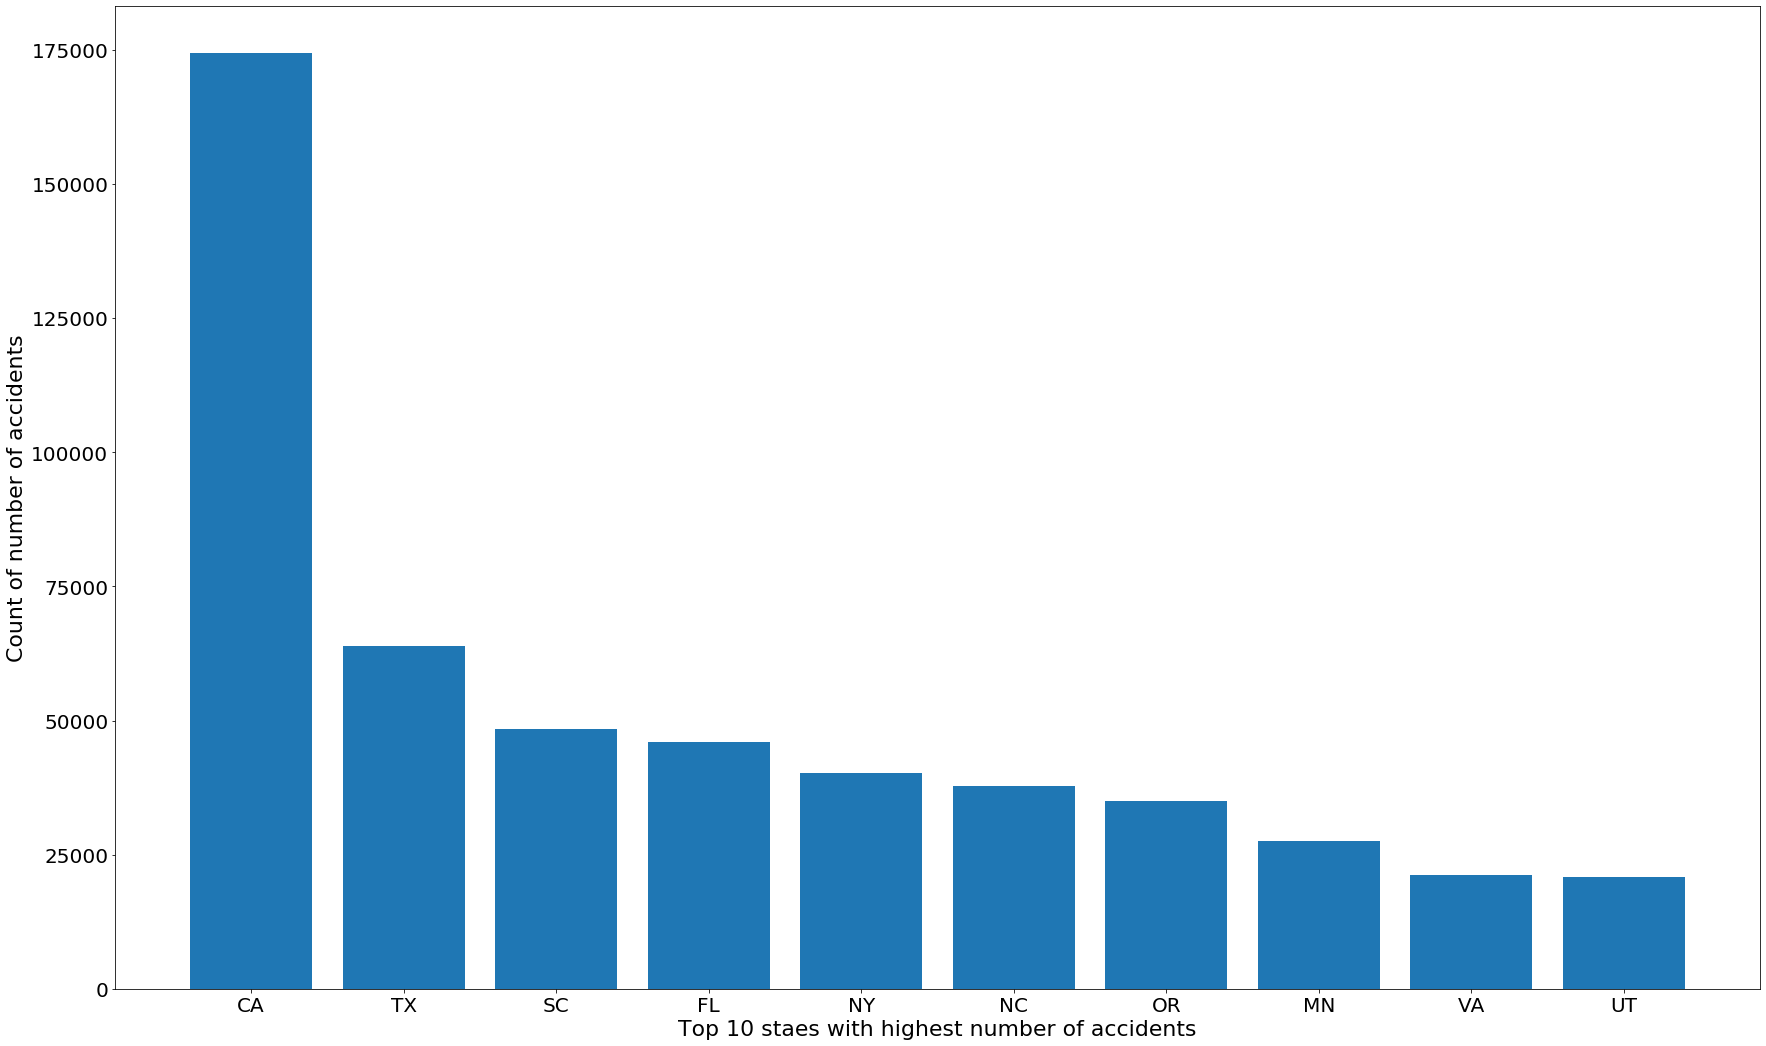

In [94]:
Top_10_States = accident_count_state_wise.head(10)
fig, ax = plt.subplots()
x = Top_10_States['State']
y = Top_10_States['ID_Count_State_Wide']
ax.bar(x, y)
ax.set_xlabel('Top 10 staes with highest number of accidents')
ax.set_ylabel('Count of number of accidents')
fig.tight_layout()
plt.show()

In [161]:
#Accidents count per State per Severity
accident_count_state_severity_wise = accidents.groupby(['State', 'Severity'], as_index=False)['ID'].count().sort_values(by = ['ID'], ascending = False)
accident_count_state_severity_wise.rename(columns = {'ID':'ID_Count_State_Severity_Wide'}, inplace = True)
accident_count_state_severity_wise

,State,Severity,ID_Count_State_Severity_Wide
12,CA,2,143126
154,TX,2,46822
143,SC,2,39449
132,OR,2,31973
95,NC,2,31724
...,...,...,...
19,CT,1,1
64,MA,1,1
105,NH,1,1
72,ME,1,1


In [115]:
#Accidents count per Severity
accident_count_severity_wise = accidents.groupby(['Severity'], as_index = False)['ID'].count().sort_values(by = 'Severity')
accident_count_severity_wise.rename(columns = {'ID' : 'ID_count_Severity_Wise'}, inplace = True)
accident_count_severity_wise


,Severity,ID_count_Severity_Wise
0,1,165
1,2,582935
2,3,194859
3,4,23320


In [ ]:
fig, ax = plt.subplots()
x = accidents['Start_Time']
y = accidents['Start_Time']
ax.plot()

## Insight
### Severity - count of accidents
    2 - Highest
    1 - Least

In [178]:
#Joining the above 3 tables
join1 = accident_count_state_severity_wise.merge(accident_count_state_wise, on = ['State'], how = 'left')
join2 = join1.merge(accident_count_severity_wise, on = 'Severity')
join2

,State,Severity,ID_Count_State_Severity_Wide,ID_Count_State_Wide,ID_count_Severity_Wise
0,CA,2,143126,174388,582935
1,TX,2,46822,63872,582935
2,SC,2,39449,48490,582935
3,OR,2,31973,35072,582935
4,NC,2,31724,37709,582935
...,...,...,...,...,...
176,CT,1,1,5117,165
177,MA,1,1,8695,165
178,NH,1,1,2001,165
179,ME,1,1,606,165


In [165]:
# Percent of accidents distribution among Severity levels in a State
Percent_Of_Each_Severity_Across_State = join2[['State', 'Severity', 'ID_Count_State_Severity_Wide']]
Percent_Of_Each_Severity_Across_State['Percent_Of_Each_Severity_Across_State'] = 100*(join2['ID_Count_State_Severity_Wide']/join2['ID_Count_State_Wide'])
Percent_Of_Each_Severity_Across_State.sort_values(by = 'Percent_Of_Each_Severity_Across_State', ascending = False)


/Users/rochinipaidisetty/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,State,Severity,ID_Count_State_Severity_Wide,Percent_Of_Each_Severity_Across_State
3,OR,2,31973,91.163891
40,ME,2,551,90.924092
9,OK,2,16260,90.388571
34,DE,2,1314,85.994764
144,SD,4,22,84.615385
...,...,...,...,...
167,CO,1,2,0.012509
159,NY,1,5,0.012446
177,MA,1,1,0.011501
149,CA,1,14,0.008028


In [166]:
#Percentage of accidents with Severity level - 2 in each State
Percent_Of_Each_Severity_Across_State[Percent_Of_Each_Severity_Across_State['Severity'] == 2].sort_values(by = 'Percent_Of_Each_Severity_Across_State', ascending = False)

,State,Severity,ID_Count_State_Severity_Wide,Percent_Of_Each_Severity_Across_State
3,OR,2,31973,91.163891
40,ME,2,551,90.924092
9,OK,2,16260,90.388571
34,DE,2,1314,85.994764
4,NC,2,31724,84.128457
8,UT,2,17252,82.675996
28,NE,2,3547,82.642125
0,CA,2,143126,82.073308
2,SC,2,39449,81.354919
10,AZ,2,14215,79.976370


In [168]:
#Percentage of accidents with Severity level - 4 in each State
Percent_Of_Each_Severity_Across_State[Percent_Of_Each_Severity_Across_State['Severity'] == 4].sort_values(by = 'Percent_Of_Each_Severity_Across_State', ascending = False)

,State,Severity,ID_Count_State_Severity_Wide,Percent_Of_Each_Severity_Across_State
144,SD,4,22,84.615385
146,ND,4,7,43.750000
139,WY,4,39,37.864078
132,WV,4,88,22.739018
143,MT,4,27,20.769231
125,AR,4,157,19.216646
138,ID,4,56,11.498973
105,MD,4,926,11.311996
145,VT,4,21,10.000000
128,DC,4,120,9.811938


## Insights:
### Severity - 4
    SD is the state with highest percent of accidents of Severity 4 - 84.6%
    ND - 2nd place - 43.75%
### Severity - 2
    Major no. of accidents are with Severity -2 
    OR, ME, OK - states with >90% of Severity 2 accidents
    SD - least with 7.6


In [169]:
Percent_Of_State_In_Each_Severity_Level = join2[['State', 'Severity', 'ID_Count_State_Severity_Wide']]
Percent_Of_State_In_Each_Severity_Level['Percent_Of_State_In_Each_Severity_Level'] = 100*(join2['ID_Count_State_Severity_Wide']/join2['ID_count_Severity_Wise'])
Percent_Of_State_In_Each_Severity_Level.sort_values(by = 'Percent_Of_State_In_Each_Severity_Level', ascending = False)


/Users/rochinipaidisetty/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,State,Severity,ID_Count_State_Severity_Wide,Percent_Of_State_In_Each_Severity_Level
0,CA,2,143126,24.552652
49,CA,3,29754,15.269503
147,SC,1,24,14.545455
148,TX,1,16,9.696970
98,FL,4,2228,9.554031
...,...,...,...,...
46,WY,2,25,0.004289
96,ND,3,5,0.002566
97,SD,3,2,0.001026
47,ND,2,4,0.000686


In [171]:
Percent_Of_State_In_Each_Severity_Level[Percent_Of_State_In_Each_Severity_Level['Severity'] == 4].head()

,State,Severity,ID_Count_State_Severity_Wide,Percent_Of_State_In_Each_Severity_Level
98,FL,4,2228,9.554031
99,GA,4,1668,7.152659
100,CA,4,1494,6.406518
101,MI,4,1489,6.385077
102,NY,4,1414,6.063465


In [172]:
Percent_Of_State_In_Each_Severity_Level[Percent_Of_State_In_Each_Severity_Level['Severity'] == 3].head()

,State,Severity,ID_Count_State_Severity_Wide,Percent_Of_State_In_Each_Severity_Level
49,CA,3,29754,15.269503
50,TX,3,16200,8.313704
51,FL,3,14013,7.191354
52,NY,3,11907,6.110572
53,SC,3,8648,4.438081


In [173]:
Percent_Of_State_In_Each_Severity_Level[Percent_Of_State_In_Each_Severity_Level['Severity'] == 2].head()

,State,Severity,ID_Count_State_Severity_Wide,Percent_Of_State_In_Each_Severity_Level
0,CA,2,143126,24.552652
1,TX,2,46822,8.032113
2,SC,2,39449,6.767307
3,OR,2,31973,5.484831
4,NC,2,31724,5.442116


In [174]:
Percent_Of_State_In_Each_Severity_Level[Percent_Of_State_In_Each_Severity_Level['Severity'] == 1].head()

,State,Severity,ID_Count_State_Severity_Wide,Percent_Of_State_In_Each_Severity_Level
147,SC,1,24,14.545455
148,TX,1,16,9.696970
149,CA,1,14,8.484848
150,NC,1,11,6.666667
151,VA,1,10,6.060606


## Insights:
### State
    CA - Highest percent of accidents in Severity level 2 and 3 
    ND, SD - Least percent of accidents
### Severity - 2:
    CA - Highest percent of accidents with Severity 2 with 24% with all other sates together constituting to the remaining percent
    SD - Lowest with 0.0003%
### Severity - 3:
    CA - Highest with 15%
    SD - Least with 0.001%
### Severity - 4:
    FL - Highest with 9.5%
    NA - Least with 0.03%
### Severity - 1:
    SC - Highest with 14.5
    NV - Least with 0.6

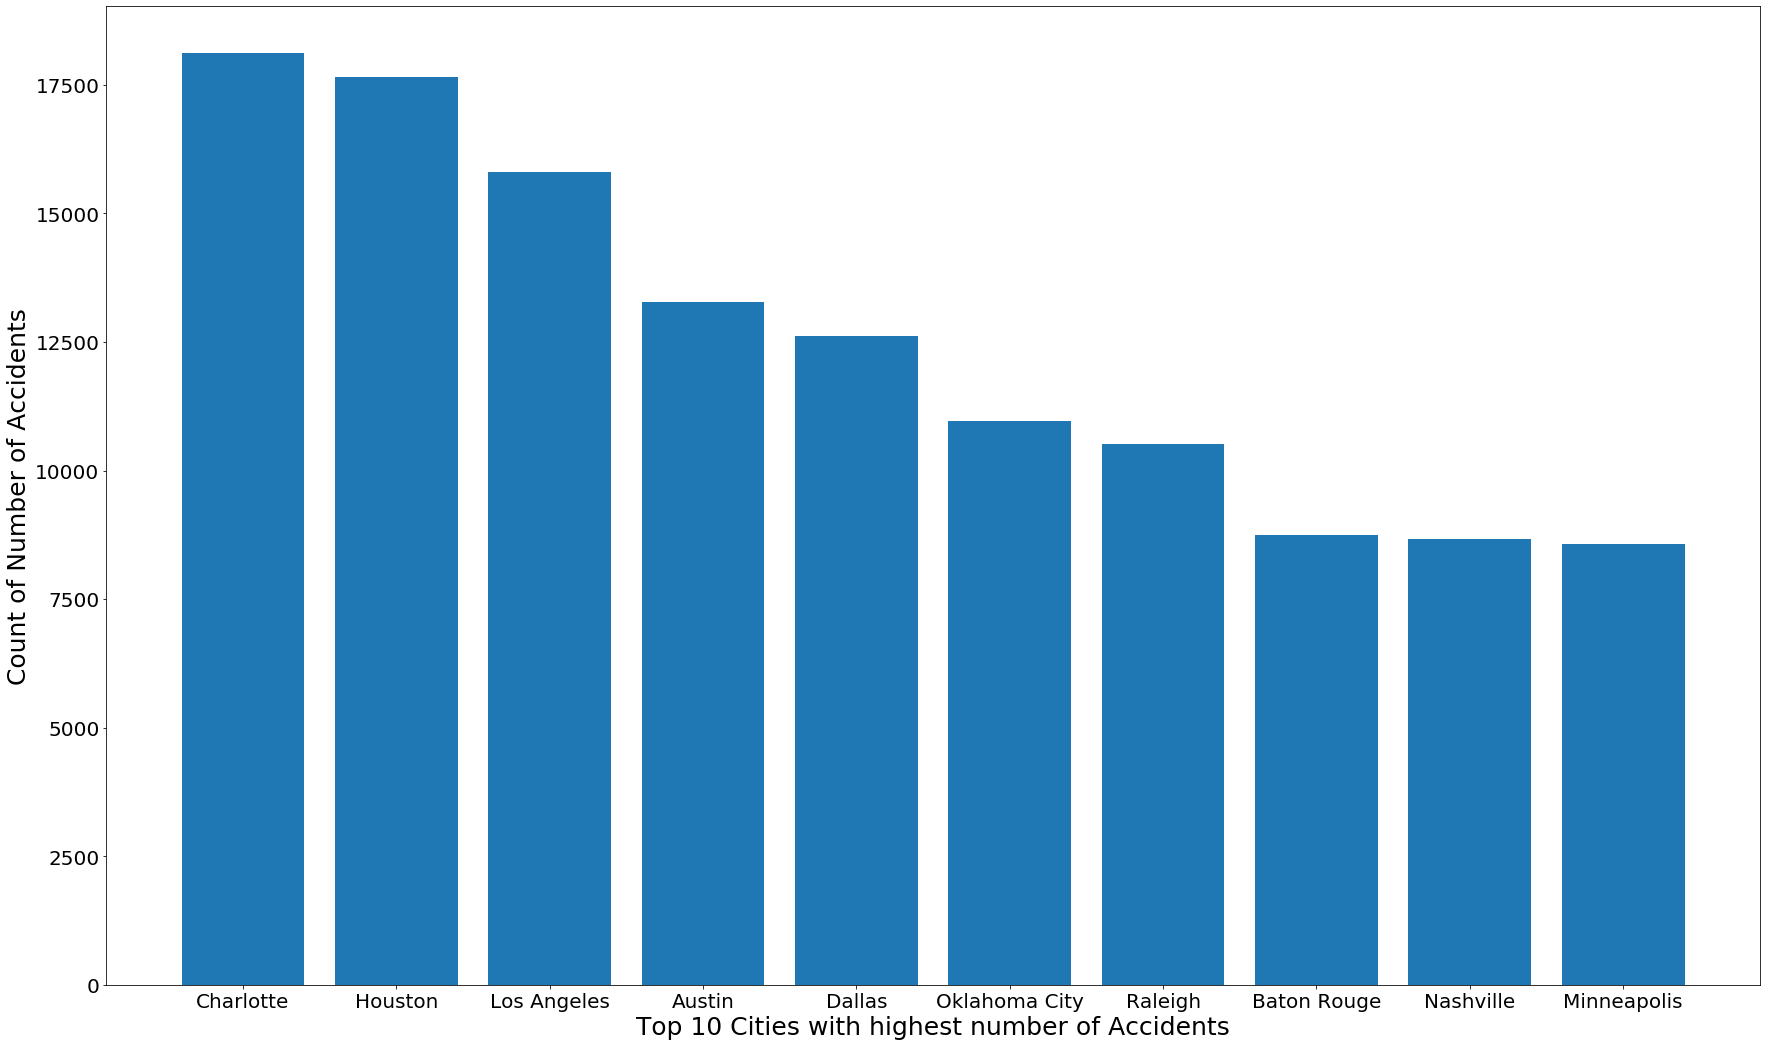

In [175]:
# City wise accidents count
city_wise_accidents = accidents.groupby(['State', 'City'], as_index = False)[['ID']].count()
city_wise_accidents.rename(columns = {'ID': 'City_Wise_Accident_Count'}, inplace = True)
city_wise_accidents = city_wise_accidents.sort_values(by = 'City_Wise_Accident_Count', ascending = False)

# Top 10 cities with highest number of accidents
Top_10_Cities = city_wise_accidents.head(10)

# Bar graph of Top 10 cities with highest number of accidents
x = Top_10_Cities['City']
y = Top_10_Cities['City_Wise_Accident_Count']
fig, ax = plt.subplots()
rects = ax.bar(x, y)
ax.set_xlabel('Top 10 Cities with highest number of Accidents', fontsize = 25)
ax.set_ylabel('Count of Number of Accidents', fontsize = 25)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
fig.tight_layout()
plt.show()

## Insights
### Top 5 cities with highest no. of accidents
    Charlotte, NC - 1
    Houston, TX - 2
    LA, CA - 3
    Austin, TX - 4
    Dallas, TX - 5
    
    Texas has 3 cities among the 5 top cities with highest no. of accidents

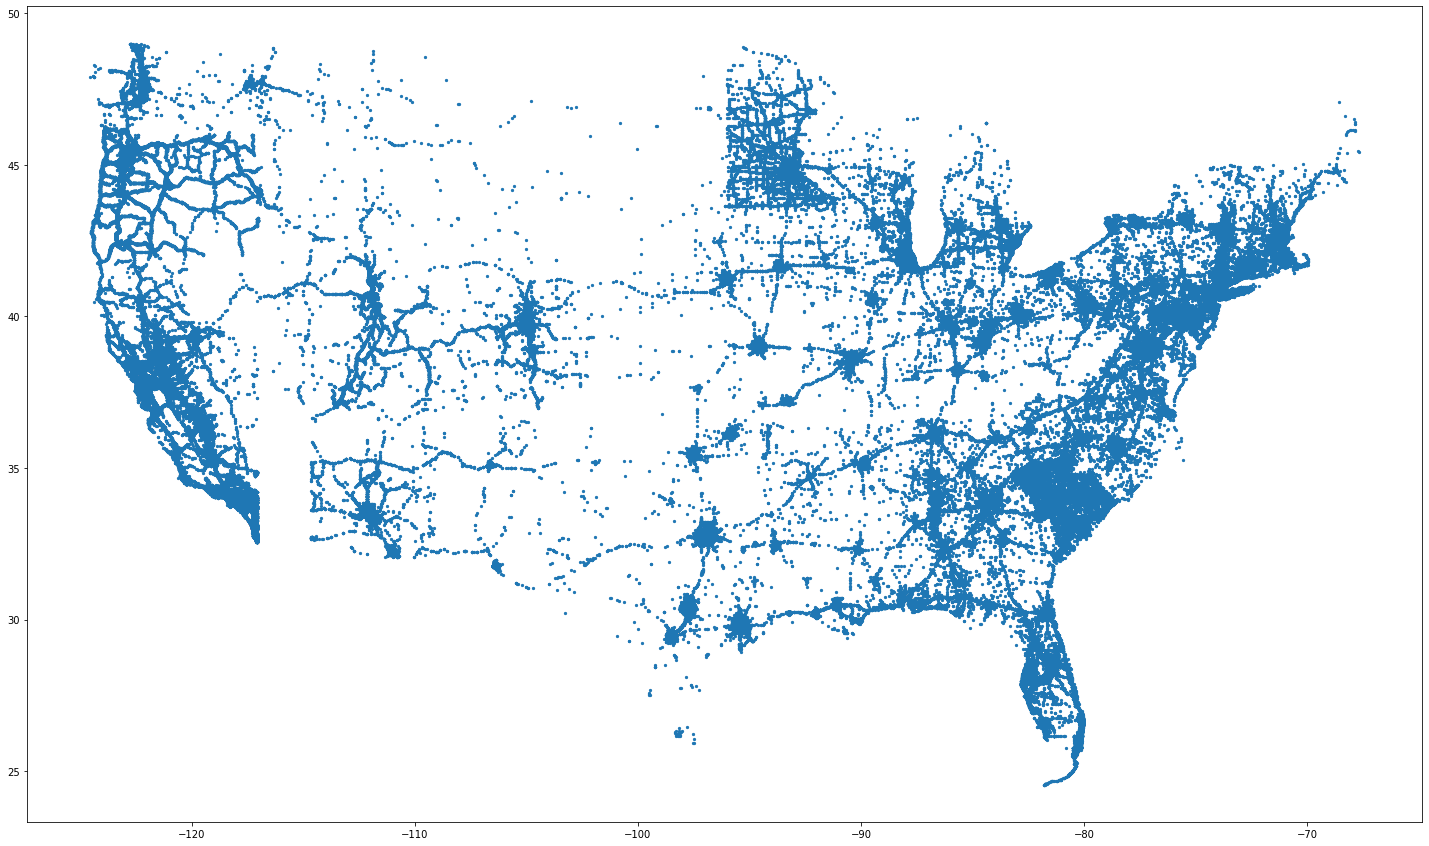

In [40]:
plt.rcParams['figure.figsize'] = (25, 15)
x = accidents['Start_Lng']
y = accidents['Start_Lat']
plt.scatter(x, y, s = 5)
plt.show()

## Insights:
### Accidents Density:
    Most of the accidents are in East zone
    West in 2nd place


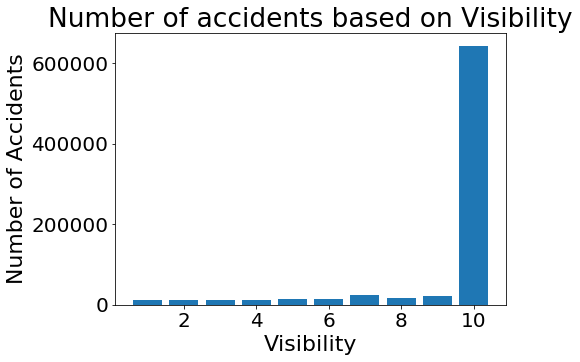

In [177]:
plt.figure(figsize = (7,5))
Visibility = accidents.groupby('Visibility(mi)', as_index = False)[['ID']].count().sort_values(by = 'ID', ascending = False).head(10)
x = Visibility['Visibility(mi)']
y = Visibility['ID']
plt.bar(x, y)
plt.xlabel('Visibility')
plt.ylabel('Number of Accidents')
plt.title('Number of accidents based on Visibility')
plt.show()

## Insights:
### Visibility:
    1. Visibility does not play a major role in accidents.
        Most of the accidents occured when the visibility is 10

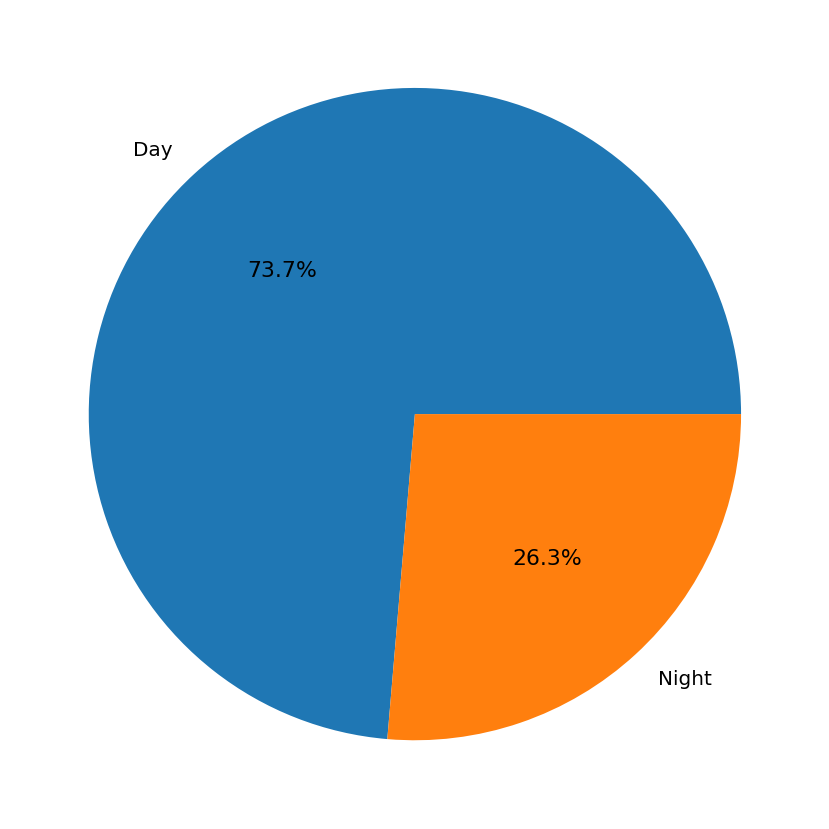

In [136]:
# Effect of Sunrise_Sunset on the occurence of the accidents
Sunrise_Sunset = accidents.groupby('Sunrise_Sunset', as_index = False)[['ID']].count()
plt.pie(Sunrise_Sunset['ID'], labels = Sunrise_Sunset['Sunrise_Sunset'], autopct='%1.1f%%')
plt.show()

## Insights:
### Sunrise_Sunset:
    1. Sunrise_Sunset does not have major effect on the occurence of an accident
        73.7% of accidents have occured in the day light

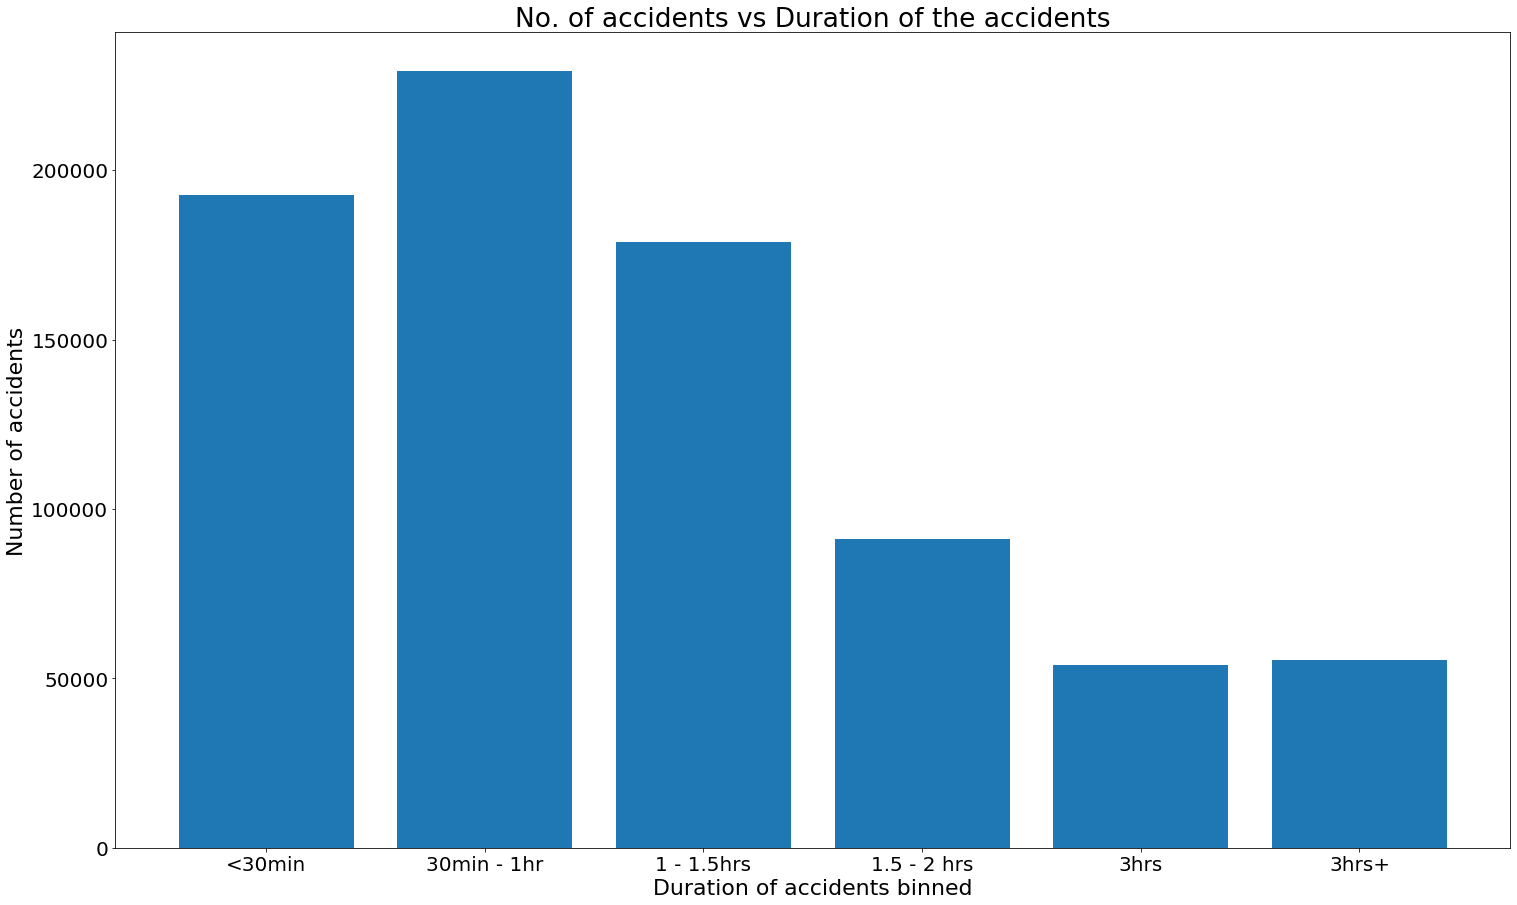

In [158]:
#Binning the column Duration
bins = [pd.Timedelta(minutes = 0), pd.Timedelta(minutes = 30), pd.Timedelta(hours = 1), pd.Timedelta(hours = 1, minutes = 30), pd.Timedelta(hours = 2), pd.Timedelta(hours = 3), pd.Timedelta(days = 294)]
labels = ['<30min', '30min - 1hr', '1 - 1.5hrs', '1.5 - 2 hrs', '3hrs', '3hrs+']
accidents['Bins'] = pd.cut(accidents['Duration'], bins, labels = labels)
accidents['Bins'].fillna('<30min', inplace = True)

#Grouping the number of accidents based on the bins
Duration_Bins = accidents.groupby('Bins', as_index = False)[['ID']].count()

#Bar graph to see the numbr of accidents in each bins
x = Duration_Bins['Bins']
y = Duration_Bins['ID']
plt.bar(x,y)
plt.title('No. of accidents vs Duration of the accidents')
plt.xlabel('Duration of accidents binned')
plt.ylabel('Number of accidents')
plt.show()

## Insights:
### Duration Bins
    Most of the accidents effected the area for around 30 min to 1 hr 

# Inferential Statistics

In [14]:
weather_conditions = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Severity']

In [15]:
weather_corr = accidents[weather_conditions].corr()
weather_corr

,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Severity
Temperature(F),1.000000,-0.353002,-0.053661,0.205051,-0.029166,-0.020118
Humidity(%),-0.353002,1.000000,0.166938,-0.386415,-0.149965,0.026598
Pressure(in),-0.053661,0.166938,1.000000,-0.080424,-0.018014,-0.007193
Visibility(mi),0.205051,-0.386415,-0.080424,1.000000,0.001517,-0.001375
Wind_Speed(mph),-0.029166,-0.149965,-0.018014,0.001517,1.000000,0.051327
Severity,-0.020118,0.026598,-0.007193,-0.001375,0.051327,1.000000


Text(0.5, 1, 'Heat map showing the correlation between the variables')

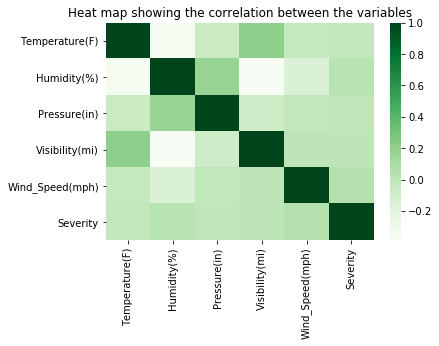

In [26]:
sns.heatmap(data = weather_corr, cmap = 'Greens')
plt.title('Heat map showing the correlation between the variables')

## Insights:
### Correlation:
    Dependent to Target - no correlation (very weak correlation)

In [17]:
# Model fitting and obataining coefficients for the Linear Regression Model
independent = accidents[weather_conditions].loc[:,accidents[weather_conditions].columns != 'Severity']
dependent = accidents[weather_conditions].loc[:,accidents[weather_conditions].columns == 'Severity']
model_fit = sm.OLS(dependent, independent).fit()
model_fit.params

Temperature(F)     0.000513
Humidity(%)        0.001252
Pressure(in)       0.070019
Visibility(mi)     0.008785
Wind_Speed(mph)    0.006989
dtype: float64

In [18]:
# Regression summary
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Severity   R-squared (uncentered):                   0.950
Model:                            OLS   Adj. R-squared (uncentered):              0.950
Method:                 Least Squares   F-statistic:                          3.405e+06
Date:                Mon, 27 Jul 2020   Prob (F-statistic):                        0.00
Time:                        12:07:00   Log-Likelihood:                     -6.8957e+05
No. Observations:              887531   AIC:                                  1.379e+06
Df Residuals:                  887526   BIC:                                  1.379e+06
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Temperature(F)      0.0005   3.09e-05     16.616      0.000       0.000       0.001
Humidity(%)         0.0013   2.87e-05     43.634      0.000       0.001       0.001
Pressure(in)        0.0700      0.000    509.474      0.000       0.070       0.070
Visibility(mi)      0.0088      0.000     41.264      0.000       0.008       0.009
Wind_Speed(mph)     0.0070      0.000     65.452      0.000       0.007       0.007
==============================================================================
Omnibus:                   190850.320   Durbin-Watson:                   1.378
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           342875.140
Skew:                           1.405   Prob(JB):                         0.00
Kurtosis:                       4.175   Cond. No.                         40.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Linear Regression Model vs Severity')

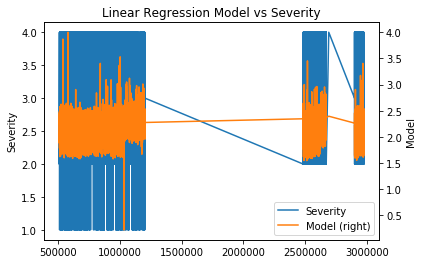

In [25]:
# Generating linear regression model
accidents['Model'] = model_fit.predict(independent)

# Plotting the Actual Severity and the model generated
ax1 = accidents.plot(y = 'Severity')
ax1.set_ylabel('Severity')

ax2 = accidents.plot(y = 'Model', secondary_y = True, ax = ax1)
ax2.set_ylabel('Model')

plt.title('Linear Regression Model vs Severity')

## Insights:
### Linear Regression Model Fit
    The Linear Regression model is a best fit with R Square = 0.95

## Insights from Analysis

In [ ]:
### 1. States:
    1. CA, California is a state with highest number of accidents of 213,307 in 2019.
        1. Number of accidents in California is more than double the accidents from the 2nd highest state, Tx, Texas with 78,706 accidents.
        
        2. 25% of accidents of Severity - 2 accidents are from CA only, the rest 75% constituting from all other states of USA.
        
    2. ND, North Dakota is a state with least number of accidents of 17 in 2019.
    
    3. SD - Being one of the states with least number of accidents, the major number of accidents in this state is of Severity - 4. With 84.6% of the total number of accidents are of Severity - 4.
    
### 2. Severity:
    1. Severity - 2: Most number of accidents are of Severity - 2 and the least with Severity - 1.
    
    2. Severity - 2:
        1. CA - Highest - 25% of Severity 2 accidents are from CA.
        
        2. OR, ME, OK - States with more than 90% of the total accidents are of Severity-2.
        
    3. Severity - 4:
        SD - 84.6% of accidents in SD are of Severity - 4.
    
### 3. Accidents Density:
    1. East, EST - Major no. of accidents are in the east zone of the country.
    2. West, PST - Next major is the West zone.
    
### 4. Top 5 States with Highest no. of accidents
    1. CA
    2. TX
    3. FL
    4. SC
    5. NC
    
### 5. Top 5 cities with highest no. of accidents
    1. Charlotte, NC
    2. Houston, TX
    3. Los Angeles, CA
    4. Austin, TX
    5. Dallas, TX
    
    Three cities among the top 5 cities are from Texas.
    
### 6. Visibility:
    1. Visibility does not play a major role in accidents.
        Most of the accidents occured are when the visibility is 10.
        
### 7. Sunrise_Sunset:
    1. Sunrise_Sunset does not have major effect on the occurence of an accident
        73.7% of accidents have occured in the day light
    
### 8. Duration Bins
    1. Most of the accidents effected the area for around 30 min to 1 hr 

### 9. Correlation:
    1. There is a weak correlation between the independent variables(weather conditions) and the target variable (Severity).
    
### 10. Linear Regression Model:
    1. The Linear Regression model is a best fit with R Square = 0.95.